In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

In [ ]:
# Load the dataset
df = pd.read_csv("New.csv")

In [ ]:
# Check for missing values
print(df.isnull().sum())
# Impute missing values with mode for categorical features
df['Habits'].fillna(df['Habits'].mode()[0], inplace=True)

Age               0
Disease           0
Symptom_1         0
Symptom_2         0
Symptom_3         0
Symptom_4      1034
Symptom_5      3599
Symptom_6      5954
Symptom_7      7956
Symptom_8      8914
Symptom_9      9681
Symptom_10    10224
Symptom_11    11169
Symptom_12    12518
Symptom_13    13244
Symptom_14    13842
Symptom_15    14038
Symptom_16    14182
Symptom_17    14543
Habits            1
Severity          1
dtype: int64


In [ ]:
# Fill missing values in symptoms columns with NaN
symptoms_columns = ['Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8',
                    'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13',
                    'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']

df[symptoms_columns] = df[symptoms_columns].fillna(np.nan)

In [ ]:
df['Disease'].unique()

array(['Fungal infection', 'Allergy', 'GERD', 'Chronic cholestasis',
       'Drug Reaction', 'Peptic ulcer diseae', 'AIDS', 'Diabetes',
       'Gastroenteritis', 'Bronchial Asthma', 'Hypertension', 'Migraine',
       'Cervical spondylosis', 'Paralysis (brain hemorrhage)', 'Jaundice',
       'Malaria', 'Chicken pox', 'Dengue', 'Typhoid', 'hepatitis A',
       'Hepatitis B', 'Hepatitis C', 'Hepatitis D', 'Hepatitis E',
       'Alcoholic hepatitis', 'Tuberculosis', 'Common Cold', 'Pneumonia',
       'Dimorphic hemmorhoids(piles)', 'Heart attack', 'Varicose veins',
       'Hypothyroidism', 'Hyperthyroidism', 'Hypoglycemia',
       'Osteoarthristis', 'Arthritis',
       '(vertigo) Paroymsal  Positional Vertigo', 'Acne',
       'Urinary tract infection', 'Psoriasis', 'Impetigo'], dtype=object)

In [ ]:
X = df[['Age', 'Symptom_1', 'Symptom_2','Symptom_3','Symptom_4','Symptom_5','Symptom_6','Symptom_7','Symptom_8','Symptom_9','Symptom_10','Symptom_11','Symptom_12','Symptom_13','Symptom_14','Symptom_15','Symptom_16', 'Symptom_17', 'Habits']]
y = df['Severity']

In [ ]:
# Encode categorical variables
label_encoder = LabelEncoder()
X['Habits'] = label_encoder.fit_transform(X['Habits'])
for col in ['Symptom_1', 'Symptom_2', 'Symptom_3', 'Symptom_4', 'Symptom_5', 'Symptom_6', 'Symptom_7', 'Symptom_8', 'Symptom_9', 'Symptom_10', 'Symptom_11', 'Symptom_12', 'Symptom_13', 'Symptom_14', 'Symptom_15', 'Symptom_16', 'Symptom_17']:
    X[col] = label_encoder.fit_transform(X[col])

<ipython-input-10-2001446a22de>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Habits'] = label_encoder.fit_transform(X['Habits'])
<ipython-input-10-2001446a22de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = label_encoder.fit_transform(X[col])
<ipython-input-10-2001446a22de>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pa

In [ ]:
# Scale numeric features
scaler = StandardScaler()
X[['Age']] = scaler.fit_transform(X[['Age']])
y = scaler.fit_transform(np.array(y).reshape(-1, 1))

<ipython-input-11-60cb87c1f38e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Age']] = scaler.fit_transform(X[['Age']])


In [ ]:
# Reshape input features for LSTM
X = np.array(X)
X = X.reshape(X.shape[0], 1, X.shape[1])

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Build the LSTM model
model = Sequential()
model.add(LSTM(units=50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(1))


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='Huber')

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test),verbose=0)

In [ ]:
loss = model.evaluate(X_test, y_test)
print("Test Loss:", loss)

93/93 [==============================] - 0s 2ms/step - loss: 1.7283
Test Loss: 1.728342056274414


Enter age: 0
Enter habits (Smoking/Drinking): Smoking
Enter current disease: Tuberculosis
(14760, 21)


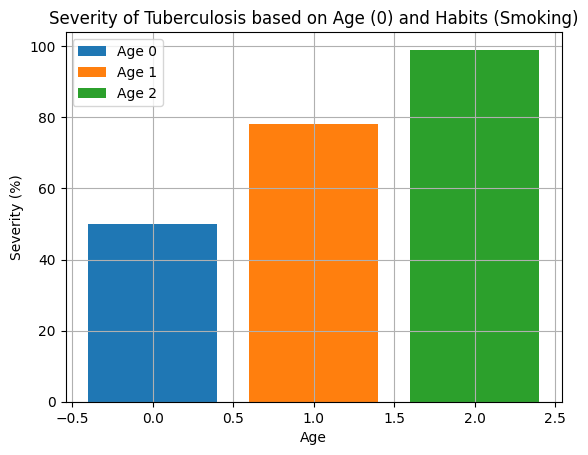

In [ ]:
import matplotlib.pyplot as plt

def plot_severity_graph(age, habits, disease):
    age_values = [age]
    if age == 0:
        age_values.extend([1, 2])
    elif age == 1:
        age_values.append(2)

    for age_val in age_values:
        filtered_data = df[(df['Age'] == age_val) & (df['Habits'] == habits) & (df['Disease'] == disease)]
        if not filtered_data.empty:

          plt.bar(filtered_data['Age'], filtered_data['Severity'] ,label=f'Age {age_val}')



    plt.title(f"Severity of {disease} based on Age ({age}) and Habits ({habits})")
    plt.xlabel("Age")
    plt.ylabel("Severity (%)")
    plt.legend()
    plt.grid(True)
    plt.show()

age = int(input("Enter age: "))
habits = input("Enter habits (Smoking/Drinking): ").capitalize()
current_disease = input("Enter current disease: ")
print(df.shape)
plot_severity_graph(age, habits, current_disease)
